In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
super_frame = pd.read_csv('df_resolute.csv', keep_default_na=False)
# convert to datetime object
super_frame['ModifiedOn'] = pd.to_datetime(super_frame['ModifiedOn'])

In [3]:
super_frame.head()

,Neighbourhood,Area_sqm,PropertyType,Bedrooms,Bathrooms,Rooms,Floor,Levels,PriceEuro,PricePerM2Euro,Latitude,Longitude,ConstructionYear,ModifiedOn
0,Cyclades Paros,80,Maisonette,3,0,0,2,0,155000,1938,0.000000,0.000000,Under construction,2019-04-24
1,Corinthia Vocha,154,Store,0,0,1,Ground floor,0,180000,1169,0.000000,0.000000,1960,2018-11-16
2,Athens - South Nea Smyrni,60,Office,0,0,0,2,0,63000,1050,0.000000,0.000000,1993,2019-04-24
3,Thessaloniki - Suburbs Thermi,1850,Business building,0,0,0,Ground floor,3,1650000,892,40.515778,22.991291,2002,2019-04-24
4,Kavala Prefecture Thasos,5000,Parcel,0,0,0,,0,75000,15,40.693836,24.556259,,2019-04-30


In [4]:
super_frame.count()

Neighbourhood       150274
Area_sqm            150274
PropertyType        150274
Bedrooms            150274
Bathrooms           150274
Rooms               150274
Floor               150274
Levels              150274
PriceEuro           150274
PricePerM2Euro      150274
Latitude            150274
Longitude           150274
ConstructionYear    150274
ModifiedOn          150274
dtype: int64

In [5]:
super_frame.dtypes

Neighbourhood               object
Area_sqm                     int64
PropertyType                object
Bedrooms                     int64
Bathrooms                    int64
Rooms                        int64
Floor                       object
Levels                       int64
PriceEuro                    int64
PricePerM2Euro               int64
Latitude                   float64
Longitude                  float64
ConstructionYear            object
ModifiedOn          datetime64[ns]
dtype: object

### check null in all columns

In [11]:
super_frame.isnull().any()

Neighbourhood       False
Area_sqm            False
PropertyType        False
Bedrooms            False
Bathrooms           False
Rooms               False
Floor               False
Levels              False
PriceEuro           False
PricePerM2Euro      False
Latitude            False
Longitude           False
ConstructionYear    False
ModifiedOn          False
dtype: bool

### select objects

In [18]:
object_list = super_frame.select_dtypes(include=['object']).columns.tolist()
object_list

['Neighbourhood', 'PropertyType', 'Floor', 'ConstructionYear']

Neighbourhood

In [16]:
super_frame.Neighbourhood.nunique()

860

In [17]:
super_frame.Neighbourhood.value_counts(sort=True).head(10)

Achaia Patra                         4239
Athens - South Glyfada               3630
Athens - South Voula                 2801
Corfu Prefecture Corfu               2441
Athens - North Kifissia              2385
Cyclades Mykonos                     2073
Cyclades Paros                       1963
Kavala Prefecture Kavala             1934
Magnesia Volos                       1914
Thessaloniki - Suburbs Kalamaria     1846
Name: Neighbourhood, dtype: int64

In [15]:
# PropertyType
super_frame.PropertyType.nunique()

31

In [13]:
super_frame.PropertyType.value_counts(sort=True).head(10)

Land Plot            43053
Apartment            33584
Detached House       19122
Maisonette           12751
Parcel               12056
Store                 5553
Business building     4391
Office                3749
Villa                 3010
Hotel                 2632
Name: PropertyType, dtype: int64

### check empty objects 

In [38]:
print("Empty Objects\n")
for i in object_list:
    print("{} : {}".format(i,len(super_frame[super_frame[i]==''])))

Empty Objects

Neighbourhood : 0
PropertyType : 0
Floor : 64544
ConstructionYear : 57471


In [23]:
len(super_frame[super_frame.ConstructionYear==''])

57471

### select numerical

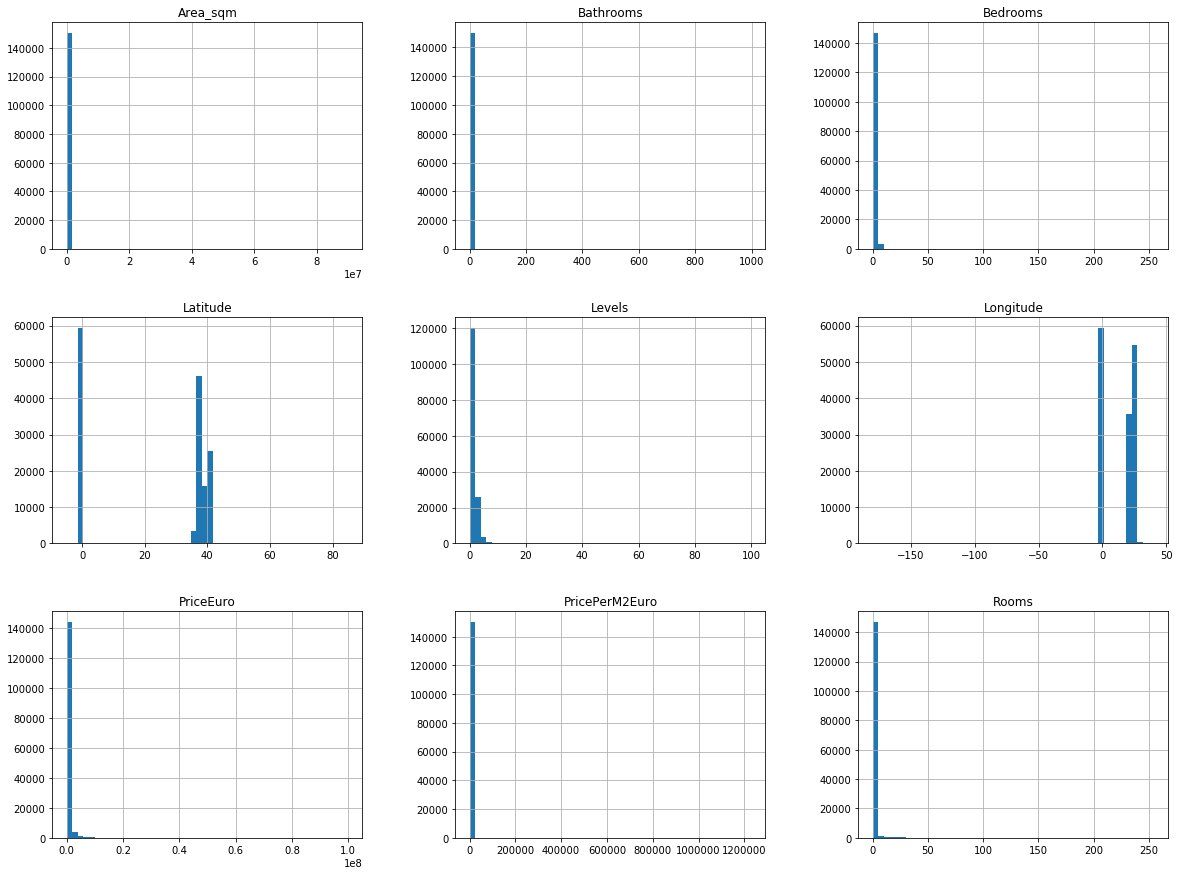

In [12]:
super_frame.select_dtypes(include=['int64','float64']).hist(bins=50, figsize=(20,15))
plt.show()

clearly there are outliers that distort the distributions

In [19]:
super_frame.select_dtypes(include=['int64','float64']).columns

Index(['Area_sqm', 'Bedrooms', 'Bathrooms', 'Rooms', 'Levels', 'PriceEuro',
       'PricePerM2Euro', 'Latitude', 'Longitude'],
      dtype='object')

In [25]:
super_frame[super_frame['PricePerM2Euro']==0]['PricePerM2Euro'].count()

286

In [10]:
super_frame['PriceEuro'].describe().apply(lambda x: format(x, 'f'))

count      150274.000000
mean       484353.387266
std       1591944.478466
min             0.000000
25%         75000.000000
50%        170000.000000
75%        400000.000000
max      99999999.000000
Name: PriceEuro, dtype: object

In [ ]:
# bins=[-100000000,20000,40000,60000,80000,100000,1000000,10000000,500000000]
# choices =['0-200k','200k-400k','400k-600k','600k-800k','800k-1mlln','1mlln-10mlln','10mlln-100mlln','100mlln-500mlln']
# super_frame['price_range']=pd.cut(super_frame['PriceEuro'],bins=bins,labels=choices)

### select lat, lng

meridian

0,0

In [39]:
# neighbourhoods with 0,0
super_frame.query("Latitude==0 and Longitude==0").Neighbourhood.nunique()

767

points out of Greece

add mapping boundaries centroid to outer points

### select datetime

In [8]:
super_frame.select_dtypes(include=['datetime64']).columns

Index(['ModifiedOn'], dtype='object')

In [ ]:
super_frame.set_index('ModifiedOn')

In [ ]:
# Add columns with year, month, and weekday name
super_frame_lol['Year'] = super_frame_lol.index.year
super_frame_lol['Month'] = super_frame_lol.index.month
super_frame_lol['Weekday Name'] = super_frame_lol.index.weekday_name

# Delete outliers